In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

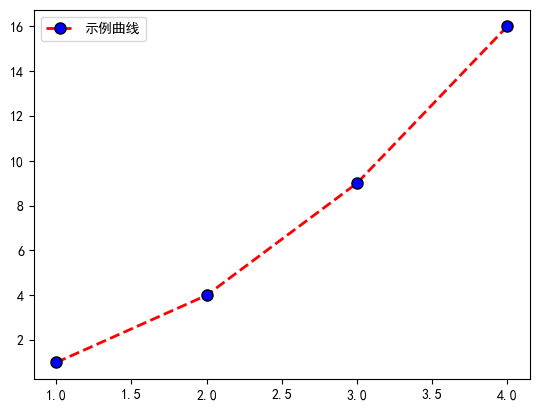

In [3]:
plt.plot(
    [1, 2, 3, 4],
    [1, 4, 9, 16],
    color='red',          # 红色线条
    linestyle='--',      # 虚线
    linewidth=2,         # 线宽 2px
    marker='o',          # 圆圈标记
    markersize=8,        # 标记大小 8px
    markerfacecolor='blue',  # 标记填充蓝色
    markeredgecolor='black', # 标记边缘黑色
    label='示例曲线'      # 图例标签
)
plt.legend()
plt.show()

# 2、使用示例：

### 示例1：图表优化

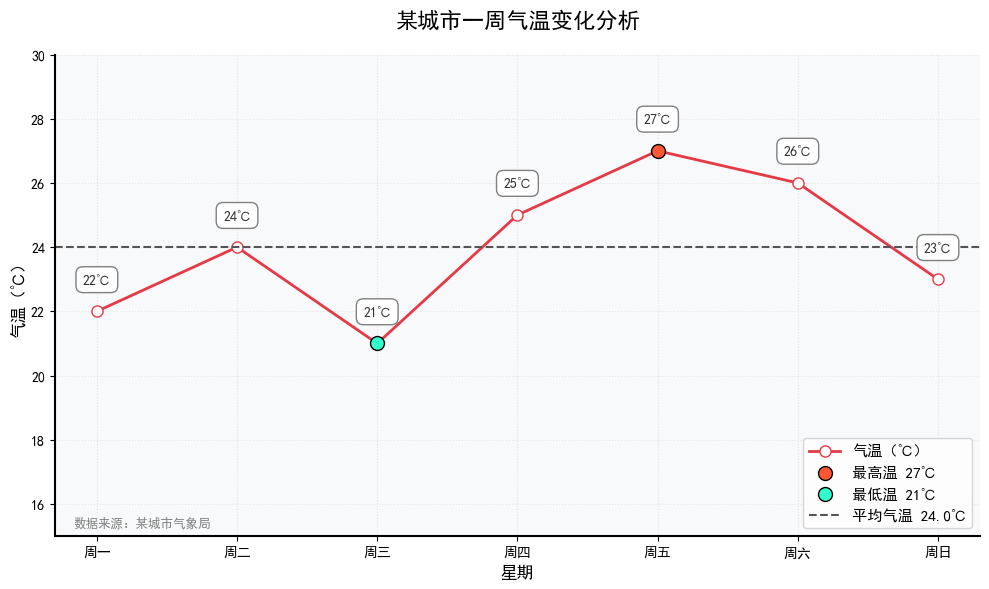

In [4]:
# 准备数据
days = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']
temp = [22, 24, 21, 25, 27, 26, 23]

plt.figure(figsize=(10, 6))

# 绘制折线（设置线宽和标记样式）
plt.plot(
    days, temp,
    color='#E63946', linestyle='-', linewidth=2,
    marker='o', markersize=8, markerfacecolor='white',
    label='气温（℃）'
)

# 添加数据标签
for x, y in zip(days, temp):
    # 在每个数据点上方添加数值标签
    plt.text(
        x, y + 0.8,  # 标签位置（x坐标，y坐标+0.5避免与标记重叠）
        f'{y}℃',    # 标签内容
        ha='center', # 水平居中对齐
        va='bottom', # 垂直底部对齐
        fontsize=10, # 字体大小
        color='#333333', # 标签颜色
        bbox=dict(facecolor='white', edgecolor='gray', pad=2, boxstyle='round,pad=0.5')  # 添加背景框
    )


# 找到最高和最低温度的位置，并进行特殊标记
max_idx = temp.index(max(temp))
min_idx = temp.index(min(temp))
plt.scatter(
    days[max_idx], temp[max_idx],
    color='#FF5733', s=100, edgecolor='black', zorder=5,
    label=f'最高温 {temp[max_idx]}℃'
)
plt.scatter(
    days[min_idx], temp[min_idx],
    color='#33FFCE', s=100, edgecolor='black', zorder=5,
    label=f'最低温 {temp[min_idx]}℃'
)

# 添加平均值参考线
avg_temp = sum(temp) / len(temp)
plt.axhline(
    y=avg_temp, color='#555555', linestyle='--', linewidth=1.5,
    label=f'平均气温 {avg_temp:.1f}℃'
)

# 添加图表细节
plt.title('某城市一周气温变化分析', fontsize=16, fontweight='bold', pad=20)  # 标题加粗
plt.xlabel('星期', fontsize=12, fontweight='bold')
plt.ylabel('气温（℃）', fontsize=12, fontweight='bold')
plt.ylim(15, 30)  # 设置y轴范围
plt.grid(True, alpha=0.3, linestyle=':')  # 添加网格（透明度0.3，点线）
plt.legend(loc='lower right', fontsize=11)  # 图例放在左下角

# 获取当前坐标轴对象
ax = plt.gca()  

# 添加数据来源标注
plt.text(
    0.02, 0.02, '数据来源：某城市气象局', 
    transform=ax.transAxes, fontsize=9, 
    style='italic', color='gray'
)

# 调整背景色
ax.set_facecolor('#F8F9FA')
# 只显示底部和左侧边框,并加粗
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

### 示例2：多条折线绘制

方法 1：多次调用 plt.plot()（最常用）

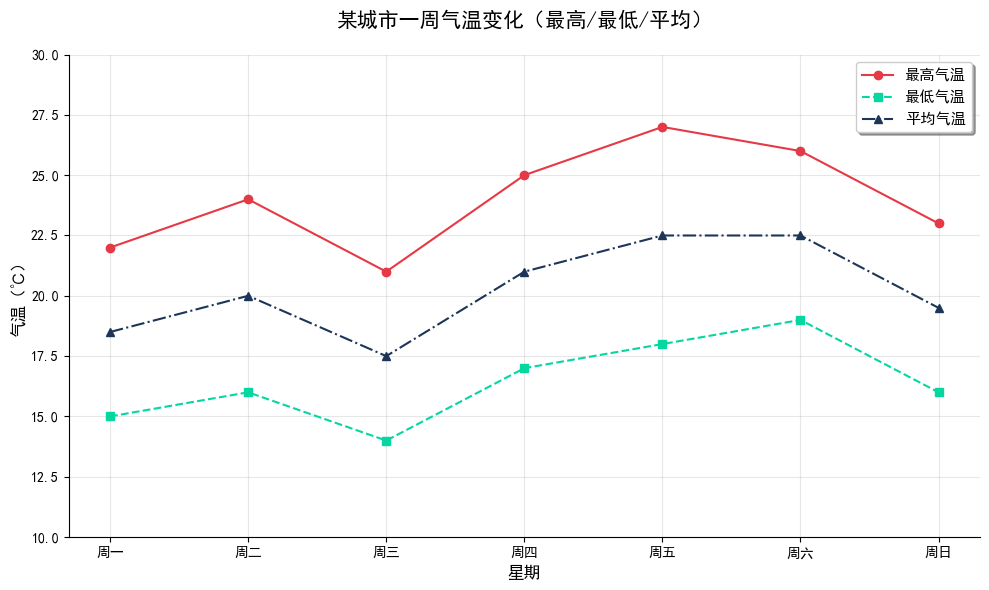

In [5]:
# 准备数据
days = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']
temp_high = [22, 24, 21, 25, 27, 26, 23]  # 最高气温
temp_low = [15, 16, 14, 17, 18, 19, 16]   # 最低气温
temp_avg = [18.5, 20, 17.5, 21, 22.5, 22.5, 19.5]  # 平均气温

# 数据与样式打包
data = [
    (temp_high, '#E63946', '-', 'o', '最高气温'),
    (temp_low, '#06D6A0', '--', 's', '最低气温'),
    (temp_avg, '#1D3557', '-.', '^', '平均气温')
]

# 创建画布
plt.figure(figsize=(10, 6))

# 循环绘制
for y, color, ls, marker, label in data:
    plt.plot(days, y, color=color, linestyle=ls, marker=marker, label=label)

# 添加图表元素
plt.title('某城市一周气温变化（最高/最低/平均）', fontsize=15, pad=20)
plt.xlabel('星期', fontsize=12)
plt.ylabel('气温（℃）', fontsize=12)
plt.ylim(10, 30)  # 调整y轴范围
plt.grid(alpha=0.3)
plt.legend(
        loc='best',          # 位置自动
        fontsize=11,         # 字体大小
        frameon=True,        # 显示边框
        fancybox=True,       # 圆角边框
        shadow=True,         # 阴影效果
          )

# 美化边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


方法 2：一次性传入多组数据（简洁写法）

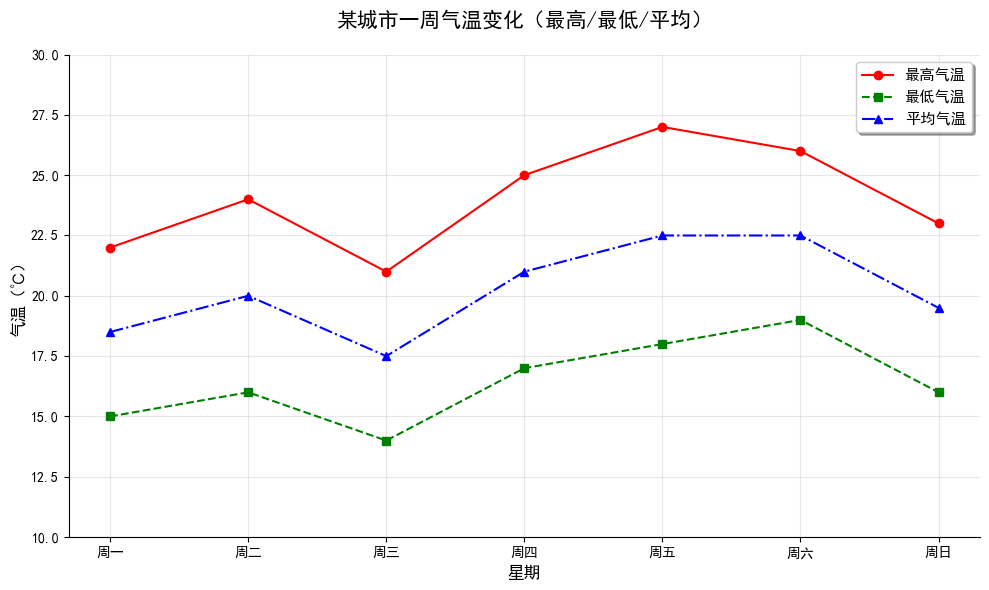

In [6]:
# 准备数据
days = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']
temp_high = [22, 24, 21, 25, 27, 26, 23]  # 最高气温
temp_low = [15, 16, 14, 17, 18, 19, 16]   # 最低气温
temp_avg = [18.5, 20, 17.5, 21, 22.5, 22.5, 19.5]  # 平均气温

# 创建画布
plt.figure(figsize=(10, 6))

# 一次性传入多组数据（x相同可省略重复x）
lines =plt.plot(
    days, temp_high, 'ro-',   # 红色(r)、圆点(o)、实线(-)
    days, temp_low, 'gs--',   # 绿色(g)、正方形(s)、虚线(--)
    days, temp_avg, 'b^-.',   # 蓝色(b)、三角形(^)、点划线(-.)
)

# 添加图表元素
plt.title('某城市一周气温变化（最高/最低/平均）', fontsize=15, pad=20)
plt.xlabel('星期', fontsize=12)
plt.ylabel('气温（℃）', fontsize=12)
plt.ylim(10, 30)  # 调整y轴范围
plt.grid(alpha=0.3)

# 手动设置图例标签
plt.legend(
    handles=lines,  # 使用plot返回的线条对象
    labels=['最高气温', '最低气温', '平均气温'],  # 手动指定标签
    loc='best',          # 位置自动
    fontsize=11,               # 字体大小
    frameon=True,              # 显示边框
    fancybox=True,             # 圆角边框
    shadow=True,               # 阴影效果
)

# 美化边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()